In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
data = pd.read_csv('insurance_data.csv')
data.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [3]:
data.shape

(27, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 564.0 bytes


In [5]:
x = data[['age']]
y = data['bought_insurance']
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=.2)

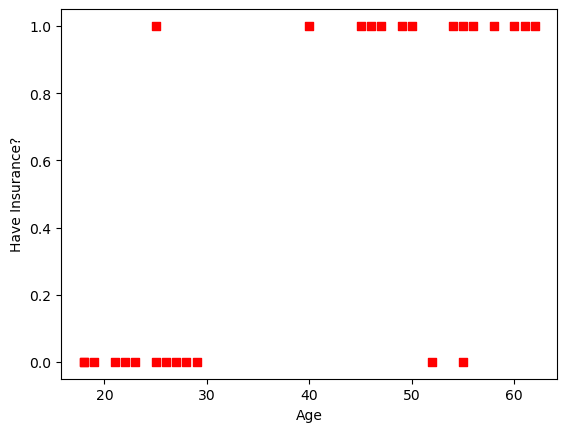

In [6]:
plt.scatter(x,y,color='red',marker='s')
plt.xlabel('Age')
plt.ylabel('Have Insurance?')
plt.show()


In [7]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [8]:
y_train_pred = log_reg.predict(x_train)
y_train_pred

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1],
      dtype=int64)

In [9]:
training_accuracy = accuracy_score(y_train,y_train_pred)
training_accuracy

0.8571428571428571

In [10]:
y_test_pred = log_reg.predict(x_test)
y_test_pred

array([0, 1, 0, 1, 0, 1], dtype=int64)

In [11]:
y_test

11    0
24    1
26    0
4     1
19    0
9     1
Name: bought_insurance, dtype: int64

In [12]:
log_reg.score(x_test,y_test)

1.0

In [13]:
testing_accuracy = accuracy_score(y_test,y_test_pred)
testing_accuracy

1.0

### Confusion Matrix

In [14]:
y_predicted = log_reg.predict(x_test)

cm=confusion_matrix(y_test_pred,y_test)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[3 0]
 [0 3]]


In [15]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

print('\nTrue Positives(TP) = ', TP)

print('\nTrue Negatives(TN) = ', TN)

print('\nFalse Positives(FP) = ', FP)

print('\nFalse Negatives(FN) = ', FN)


True Positives(TP) =  3

True Negatives(TN) =  3

False Positives(FP) =  0

False Negatives(FN) =  0


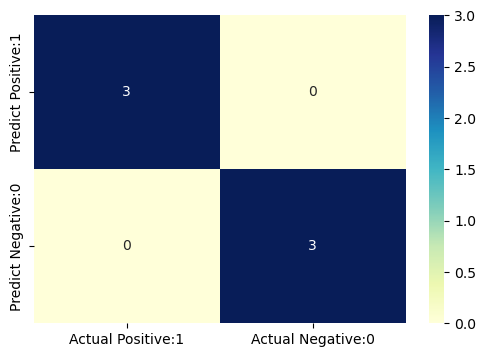

In [16]:
# visualize confusion matrix with seaborn heatmap

import seaborn as sns

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

plt.figure(figsize=(6,4))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

plt.show()

### accuracy=TP+TN/TP+TN+FP+FN

In [17]:
accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Model Accuracy : ',accuracy)

Model Accuracy :  1.0


In [18]:
precision = TP/(TP+FP)
print('Precision : ',precision)

Precision :  1.0


In [19]:
recall = TP/(TP+FN)
print('Recall : ',recall)

Recall :  1.0


In [20]:
classf_report = classification_report(y_test, y_test_pred)

print(classf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



### Load Digits dataset

In [21]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [22]:
digits=load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [23]:
len(digits)

7

In [24]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [25]:
digits.data[100]

array([ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15.,
        0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  2.,  0.,  0.,  0.,  0.,
       15., 12.,  1., 16.,  4.,  0.,  0.,  4., 16.,  2.,  9., 16.,  8.,
        0.,  0.,  0., 10., 14., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
       13.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.])

In [26]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [27]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

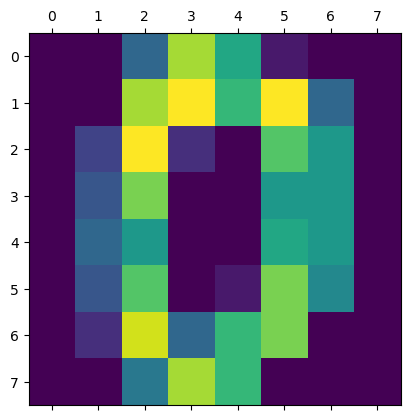

In [28]:
plt.matshow(digits.images[0])

In [29]:
xtrain,xtest,ytrain,ytest=train_test_split(digits['data'],digits['target'],test_size=.2)

In [30]:
model=LogisticRegression()
model.fit(xtrain,ytrain)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
model.score(xtest,ytest)

0.9666666666666667

8

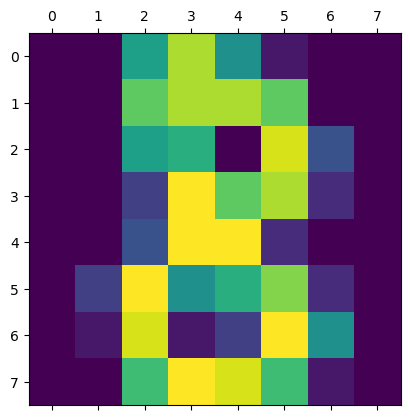

In [32]:
plt.matshow(digits.images[8])
digits.target[8]


In [33]:
pred = model.predict([digits.data[8]])

In [34]:
pred

array([8])